# Custom Datasets

In [118]:
import torch
import numpy as np
import torch.nn as nn
from pathlib import Path
import os
import random
from PIL import Image
from torch.utils.data import Dataset
import matplotlib.image as mpimg
from typing import Tuple, List, Dict
import matplotlib.pyplot as plt
from torchinfo import summary
from tqdm.auto import tqdm

In [2]:
image_path = Path('data/pizza_steak_sushi/')

## Becoming One with the Data

In [3]:
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
        dir_path (str or pathlib.Path): target directory
  
    Returns:
        A print out of:
            number of subdiretories in dir_path
            number of images (files) in each subdirectory
            name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [4]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

### Visualizing an Image

Random image path: data\pizza_steak_sushi\train\steak\560503.jpg
Image class: steak
Image height: 512
Image width: 512


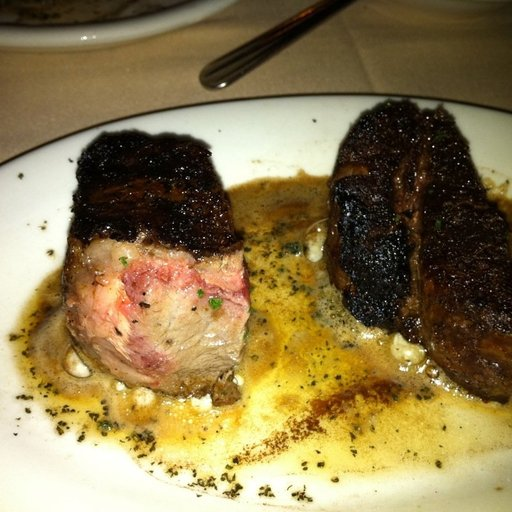

In [5]:
# Set random seed
# random.seed(42)

# Get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

# Pick a random image path 
random_image_path = random.choice(image_path_list)

# Get the image class from path name
image_class = random_image_path.parent.stem

# Open image
img = Image.open(random_image_path)

# Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

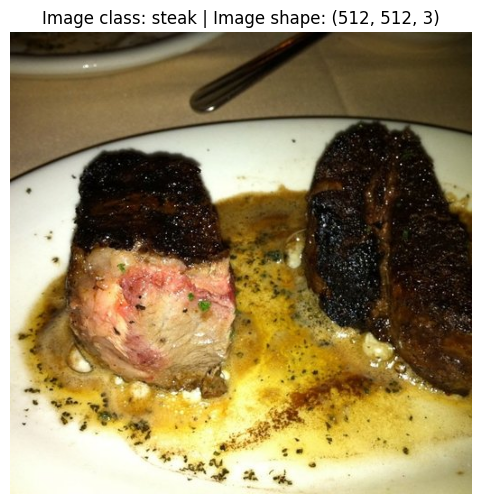

In [6]:
# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape}')
plt.axis(False)

## Transforming Data

Before we can use the image data with pytorch:
1. Turn the data into tensors
2. Turn the data into a *Dataset* i.e `torch.utils.data.Dataset` and then into a *Dataloader* i.e `torch.utils.data.Dataloader`
3. 

In [7]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transforming with `torchvision.transforms`

In [8]:
# Write a transform for image
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)), # Resize the images to 64x64
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [9]:
data_transform(img)

tensor([[[0.0902, 0.0941, 0.1059,  ..., 0.2000, 0.1765, 0.1529],
         [0.1412, 0.1333, 0.1020,  ..., 0.1882, 0.1686, 0.1529],
         [0.1569, 0.1529, 0.1294,  ..., 0.2078, 0.1922, 0.1765],
         ...,
         [0.9843, 0.9843, 0.9882,  ..., 0.6667, 0.6275, 0.6392],
         [0.9843, 0.9843, 0.9843,  ..., 0.7020, 0.6863, 0.6706],
         [0.9882, 0.9882, 0.9882,  ..., 0.7255, 0.7098, 0.6902]],

        [[0.0627, 0.0706, 0.0784,  ..., 0.1686, 0.1490, 0.1255],
         [0.1020, 0.1020, 0.0706,  ..., 0.1529, 0.1373, 0.1294],
         [0.1294, 0.1255, 0.0941,  ..., 0.1647, 0.1529, 0.1451],
         ...,
         [0.9843, 0.9922, 1.0000,  ..., 0.6353, 0.5843, 0.6078],
         [0.9843, 0.9922, 0.9961,  ..., 0.6745, 0.6588, 0.6431],
         [0.9843, 0.9882, 0.9922,  ..., 0.6980, 0.6863, 0.6667]],

        [[0.0196, 0.0196, 0.0275,  ..., 0.0784, 0.0706, 0.0549],
         [0.0510, 0.0431, 0.0196,  ..., 0.0627, 0.0588, 0.0549],
         [0.0863, 0.0745, 0.0431,  ..., 0.0745, 0.0667, 0.

In [10]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    """
    Selects random images from a path of images and plots them
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nSize: {f.size}')
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nShape: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16) 

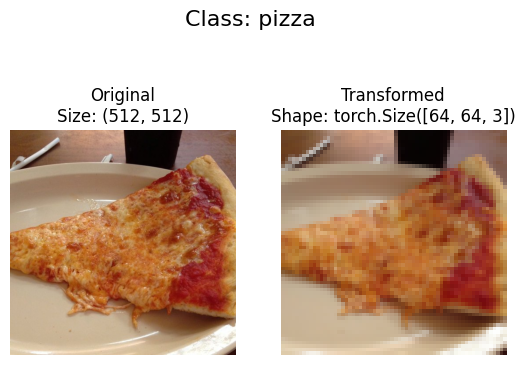

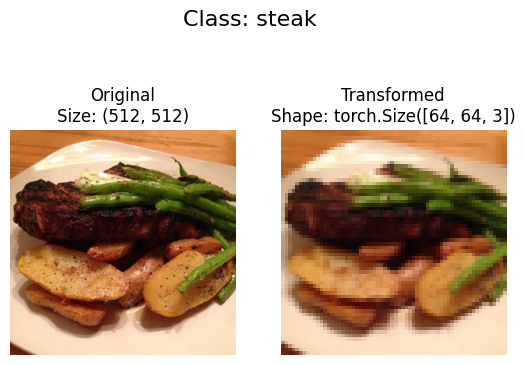

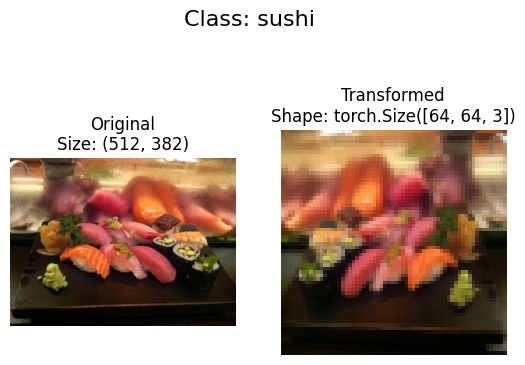

In [11]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform)

## Loading Image Data Using `ImageFolder`

In [12]:
train_dir

WindowsPath('data/pizza_steak_sushi/train')

In [13]:
# Use ImageFolder to create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
# Get class names
class_names = train_data.classes
class_dict = train_data.class_to_idx

In [15]:
# Index on the train data dataset and get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f'Image tensor: \n{img}')
print(f'image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {label}')
print(f'Label datatype: {type(label)}')

Image tensor: 
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original: torch.Size([3, 64, 64])
Image permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

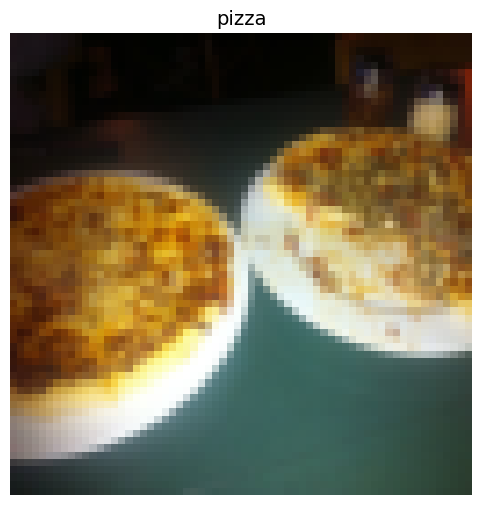

In [16]:
# Plot the image
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f'Original: {img.shape}\nImage permute: {img_permute.shape}')

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

## Turn Loaded Images into `DataLoader`

In [40]:
# Turn train and test datasets into dataloaders
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x22c9a06b6a0>,
 <torch.utils.data.dataloader.DataLoader at 0x22c9a068280>)

In [41]:
img, label = next(iter(train_dataloader))

print(f'Image shape: {img.shape}')
print(f'Label shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])


## Loading Image Data with a Custom Dataset

We want:
1. To be able to load images from file
2. To be able to get class names from dataset
3. To be able to get classes as dictionary from the dataset

Pros:
* Can create a `Dataset` out of anything
* Not limited to pytorch pre-built 'Dataset` functions

In [42]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a Helper Function to get Class Names

In [43]:
# Setup path for target directory
target_directory = train_dir
print(f'Target dir: {target_directory}')

# Get class names from target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [44]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory."""
    # Get the class names by scanning the target dir
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    # Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f'Could not find any classes in {directory}... please check file structure')
    # Create a dictionary of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [45]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create a Custom Dataset

In [46]:
# Write a custom dataset 
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform: None) -> None:
        self.paths = list(Path(targ_dir).glob('*/*.jpg'))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, idx: int) -> Image.Image:
        image_path = self.paths[idx]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, int]:
        img = self.load_image(idx)
        class_name = self.paths[idx].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        
        return img, class_idx

In [47]:
# Create a transform 
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [48]:
# Test the ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)

In [49]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x22c9a07c6d0>,
 <__main__.ImageFolderCustom at 0x22c9a07c7c0>)

In [50]:
len(train_data), len(train_data_custom)

(225, 225)

In [51]:
len(test_data), len(test_data_custom)

(75, 75)

In [52]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

### Create a Function to Display Random Images

In [53]:
# Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
    if seed: random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16, 8))
    for i, targ_sample in enumerate(random_samples_idx):
        targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_img_adj = targ_img.permute(1, 2, 0)
        plt.subplot(1, n, i + 1)
        plt.imshow(targ_img_adj)
        plt.axis(False)
        if classes:
            title = f'Class: {classes[targ_label]}'
            if display_shape:
                title += f'\nshape: {targ_img_adj.shape}'
        plt.title(title)

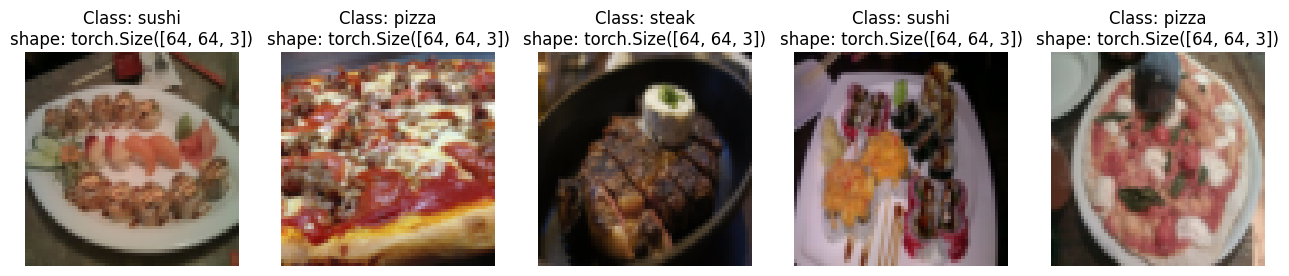

In [54]:
# Display images from original dataset
display_random_images(train_data, class_names, 5)

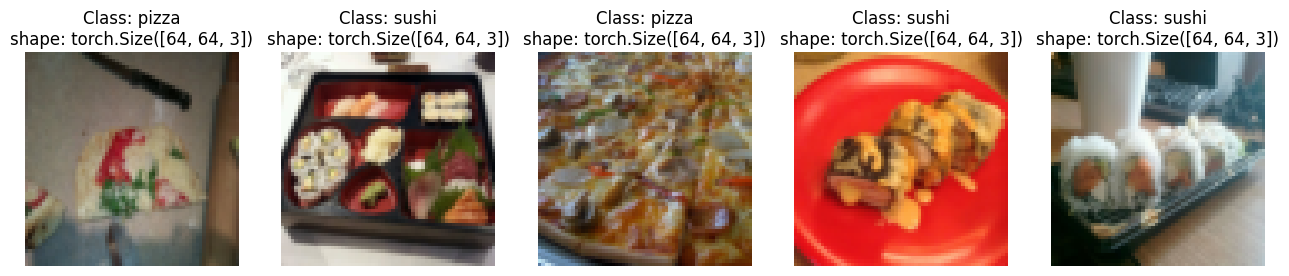

In [55]:
# Display random images from the custom dataset
display_random_images(train_data_custom, class_names, 5)

### Turn Custom Loaded Images into DataLoaders

In [60]:
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=0)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x22c9a3c85e0>,
 <torch.utils.data.dataloader.DataLoader at 0x22c98e6dcc0>)

In [61]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## Data Augmentation

In [62]:
# Trivial augment
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

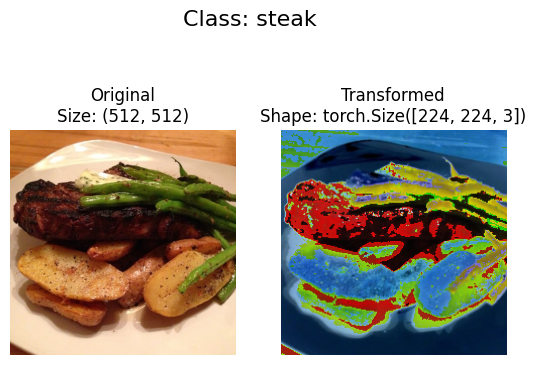

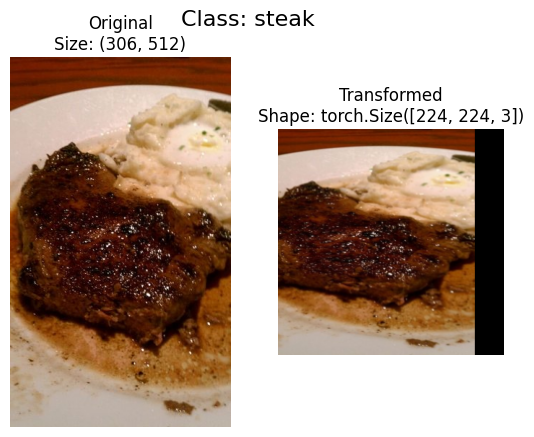

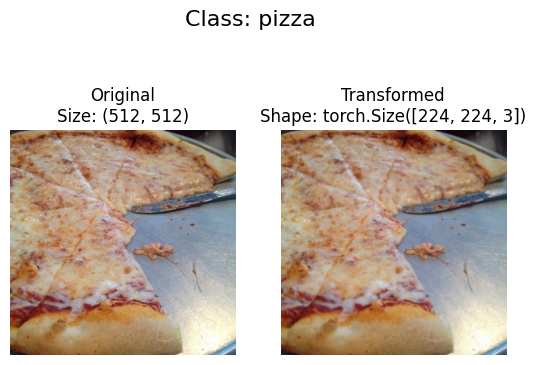

In [65]:
# Plot random images
plot_transformed_images(image_path_list, train_transform)

## Model 0: TinyVGG without data augmentation

### Create transforms and load data for model 0

In [66]:
# Create a simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [67]:
# Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

In [68]:
# Turn datasets into dataloaders
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=32,
                                     num_workers=1,
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=32,
                                    num_workers=1)

### Create TinyVGG Model

In [100]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super(TinyVGG, self).__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                      kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, 1, 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13, out_features=output_shape) # in_features to be determined later 
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [101]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [102]:
torch.manual_seed(42)
model_0 = TinyVGG(3, 10, len(class_names)).to(device)

### Try a forward pass on a single image


In [87]:
image_batch, lable_batch = next(iter(train_dataloader_simple))
image_batch.shape, lable_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [109]:
summary(model=model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### Create train and test loops function

In [128]:
# Create train step function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += ((y_pred_class == y).sum().item() / len(y_pred))

    train_acc /= len(dataloader)
    train_loss /= len(dataloader)
    return train_loss, train_acc

In [129]:
# Create a test step function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

### Create a `train()` Function to Combine `train_step()` and `test_step()`

In [130]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
    results = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
        test_loss, test_acc = test_step(model, test_dataloader, loss_fn)
        print(f'===================== Epoch: {epoch} =====================')
        print(f'Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_acc'].append(test_acc)
        results['test_loss'].append(test_loss)
    return results

### Training and Evaluating Model 0

In [148]:
# Set the random seed
torch.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=1e-3)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple, 
                        test_dataloader=test_dataloader_simple, 
                        optimizer=optimizer, 
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS, device=device)

end_time = timer()
print(f'Total training time: {end_time - start_time:.3f}s')

  0%|          | 0/5 [00:00<?, ?it/s]

===================== Epoch: 0 =====================
Train loss: 1.1063 | Train acc: 0.3047 | Test loss: 1.0983 | Test acc: 0.3011
===================== Epoch: 1 =====================
Train loss: 1.0998 | Train acc: 0.3281 | Test loss: 1.0697 | Test acc: 0.5417
===================== Epoch: 2 =====================
Train loss: 1.0869 | Train acc: 0.4883 | Test loss: 1.0808 | Test acc: 0.4924
===================== Epoch: 3 =====================
Train loss: 1.0844 | Train acc: 0.3984 | Test loss: 1.0608 | Test acc: 0.5833
===================== Epoch: 4 =====================
Train loss: 1.0662 | Train acc: 0.4141 | Test loss: 1.0656 | Test acc: 0.5644
Total training time: 61.391s


### Plot the Loss Curves of Model 0

In [149]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary."""
    loss = [grad.item() for grad in results['train_loss']]
    test_loss = results['test_loss']
    
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(accuracy))

    # Setup a plot
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend();

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

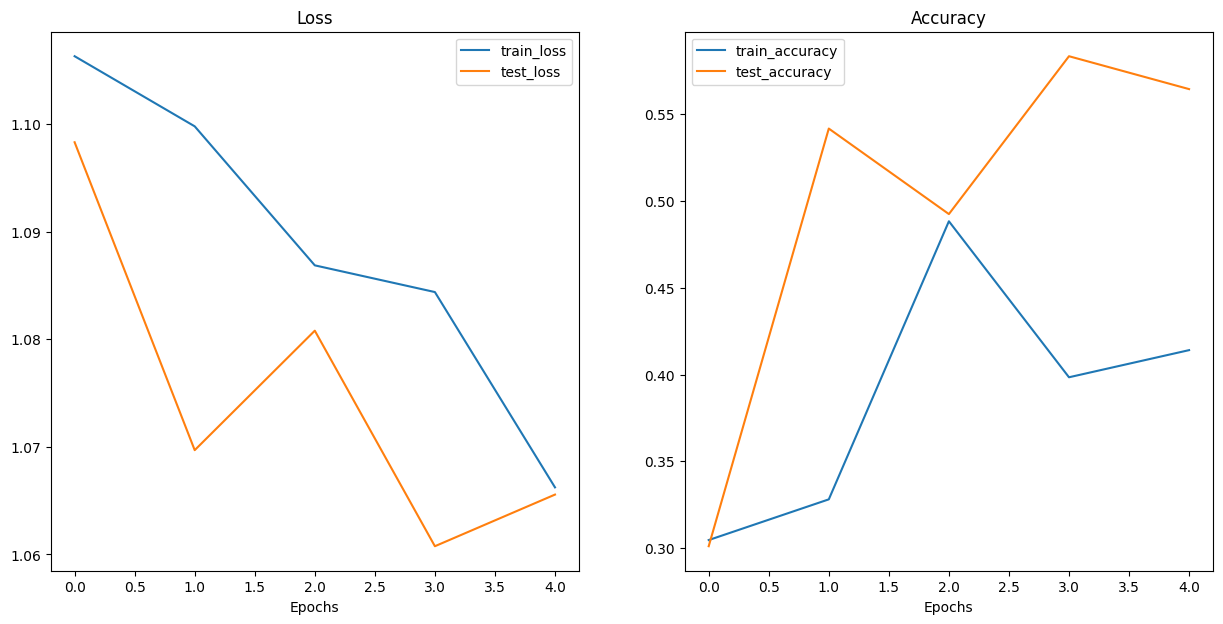

In [150]:
plot_loss_curves(model_0_results)

## Model 1: TinyVGG With Data Augmentation

In [151]:
# Create transform with data augmentation
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### Create Train and Test Datasets and Dataloaders with Data Augmentation


In [152]:
# Turn image folders into datasets
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transform_simple)

In [153]:
# Turn our datasets into dataloaders
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS)

### Construct and Train Model 1

In [154]:
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [155]:
torch.manual_seed(42)

NUM_EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=1e-3)

start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn)

end_time = timer()
print(f'Total training time for model 1: {end_time - start_time:.3f}s')

  0%|          | 0/5 [00:00<?, ?it/s]

===================== Epoch: 0 =====================
Train loss: 1.1048 | Train acc: 0.2500 | Test loss: 1.1014 | Test acc: 0.2604
===================== Epoch: 1 =====================
Train loss: 1.0773 | Train acc: 0.4258 | Test loss: 1.1299 | Test acc: 0.2604
===================== Epoch: 2 =====================
Train loss: 1.0760 | Train acc: 0.4258 | Test loss: 1.1674 | Test acc: 0.2604
===================== Epoch: 3 =====================
Train loss: 1.1245 | Train acc: 0.3047 | Test loss: 1.1512 | Test acc: 0.2604
===================== Epoch: 4 =====================
Train loss: 1.0817 | Train acc: 0.4570 | Test loss: 1.1479 | Test acc: 0.2917
Total training time for model 1: 116.371s


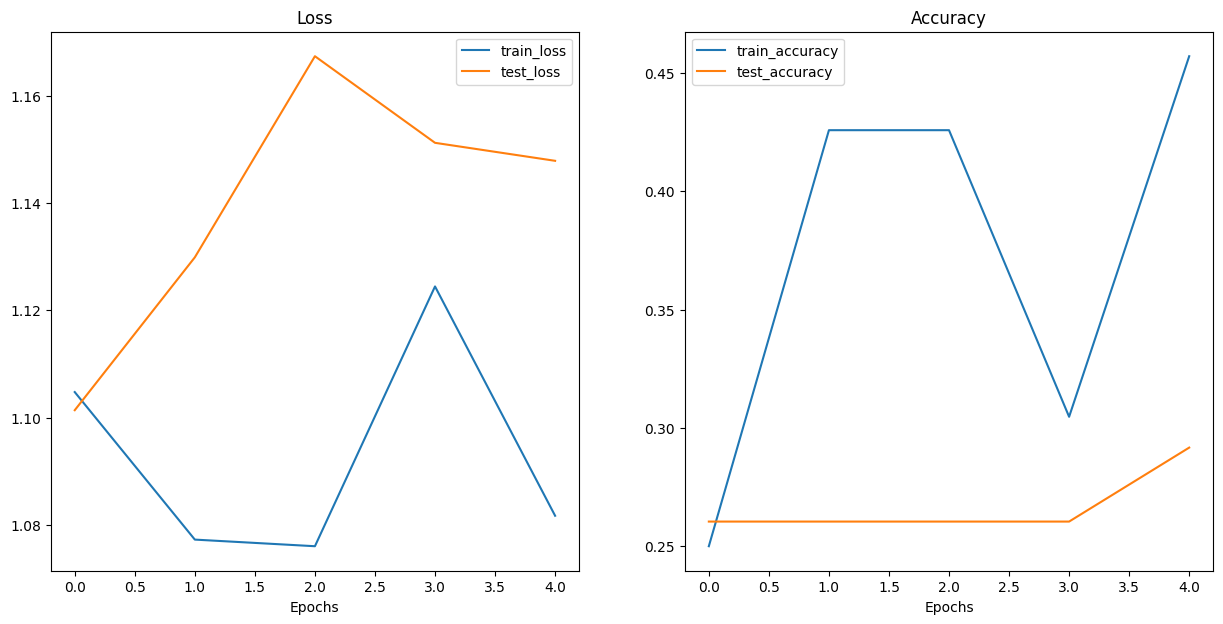

In [157]:
plot_loss_curves(model_1_results)